In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas import read_csv, DataFrame, Series

In [2]:
train_data = read_csv('/home/yuliya/Desktop/kaggle_Titanic/data/train.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1 - first class
2 - second class
3 - fhird class


<AxesSubplot:xlabel='Pclass'>

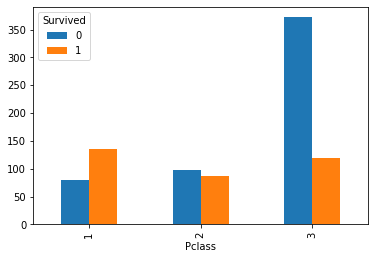

In [5]:
train_data.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=False)

<AxesSubplot:xlabel='Pclass'>

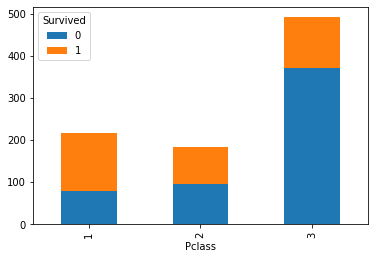

In [6]:
train_data.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True)

<AxesSubplot:title={'center':'Parch'}, xlabel='Parch'>

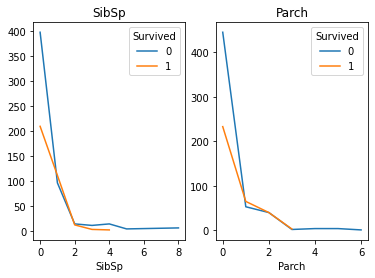

In [7]:
fig, axes = plt.subplots(ncols=2)
train_data.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(ax=axes[0], title='SibSp')
train_data.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1], title='Parch')

<AxesSubplot:title={'center':'Parch'}, xlabel='Parch'>

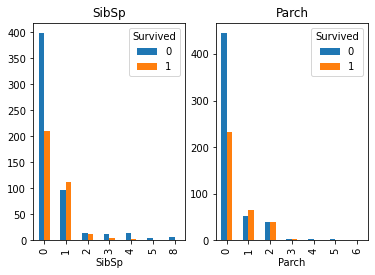

In [8]:
fig, axes = plt.subplots(ncols=2)
train_data.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(kind='bar', ax=axes[0], title='SibSp')
train_data.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(kind='bar', ax=axes[1], title='Parch')

Count of all rows

In [9]:
train_data.PassengerId.count()

891

Count of rows by cabin with full value

In [10]:
train_data.PassengerId[train_data.Cabin.notnull()].count()

204

As we can see too much empty rows by cabin, therefore we can drop this column

In [11]:
train_data = train_data.drop(['Cabin'], axis=1)

Count of rows by age with full value

In [12]:
train_data.PassengerId[train_data.Age.notnull()].count()

714

Calculate median age

In [13]:
median_age = train_data.Age.median()
print(median_age)

28.0


In [14]:
train_data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Fill empty rows by median age

In [15]:
train_data.Age = train_data.Age.fillna(median_age)

In [16]:
train_data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [17]:
train_data[train_data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [18]:
MaxPassEmbarked = train_data.groupby('Embarked').count()['PassengerId']

In [19]:
MaxPassEmbarked

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [20]:
MaxPassEmbarkedClass = MaxPassEmbarked[MaxPassEmbarked == MaxPassEmbarked.max()].index[0]
train_data.Embarked = train_data.Embarked.fillna(MaxPassEmbarkedClass)

Drop unnecessary fields since this is only reference information and will not help us in any way

In [21]:
train_data = train_data.drop(['PassengerId','Name','Ticket'],axis=1)

Now we code values

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dicts = {}

In [23]:
label_encoder.fit(train_data.Sex.drop_duplicates())
dicts['Sex'] = list(label_encoder.classes_)
train_data.Sex = label_encoder.transform(train_data.Sex)

label_encoder.fit(train_data.Embarked.drop_duplicates())
dicts['Embarked'] = list(label_encoder.classes_)
train_data.Embarked = label_encoder.transform(train_data.Embarked)

In [24]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


Preparing test data with same operations

In [25]:
test_data = read_csv('/home/yuliya/Desktop/kaggle_Titanic/data/test.csv')

In [26]:
test_data.Age = test_data.Age.fillna(median_age)
test_data.Fare = test_data.Fare.fillna(test_data.Fare.median())
MaxPassEmbarked = test_data.groupby('Embarked').count()['PassengerId']
MaxPassEmbarkedClass = MaxPassEmbarked[MaxPassEmbarked == MaxPassEmbarked.max()].index[0]
test_data.Embarked = test_data.Embarked.fillna(MaxPassEmbarkedClass)

In [27]:
test_data = test_data.drop(['Name','Ticket','Cabin', 'PassengerId'],axis=1)

label_encoder.fit(dicts['Sex'])
test_data.Sex = label_encoder.transform(test_data.Sex)

label_encoder.fit(dicts['Embarked'])
test_data.Embarked = label_encoder.transform(test_data.Embarked)

In [28]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,28.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,28.0,0,0,8.0500,2


In [29]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [32]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import pylab as pl

In [33]:
target = train_data.Survived
train_data = train_data.drop(['Survived'], axis=1)

In [34]:
kfold = 5
itog_val = {}